In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [43]:
class Perceptron():
  def __init__(self,w0=1,w1=0.1,w2=0.1):
    self.w0 = w0
    self.w1 = w1
    self.w2 = w2
  
  def w_sum(self,x1,x2):
    return x1*self.w1 + x2*self.w2 + 1*self.w0
  
  def step_function(self,z):
    if(z>=0):
      return 1
    else:
      return 0
  
  def predict(self,x1,x2):
    z = self.w_sum(x1,x2)
    return self.step_function(z)

  def fit(self, X, y, epochs=1, step=0.1, verbose=True):
    errors = []
    for epoch in range(epochs):
      error = 0
      for i in range(len(X)):
        x1, x2, target = X[i][0], X[i][1], y[i]
        update = step * (target - self.predict(x1,x2))
        self.w1 += update*x1
        self.w2 += update*x2
        self.w0 += update
        error += int(update != 0.0)
      errors.append(error)
    if verbose:
      print("Epochs: {} - Error: {} - Errors from all epochs {}".format(epoch, error, errors))

Epochs: 0 - Error: 3 - Errors from all epochs [3]


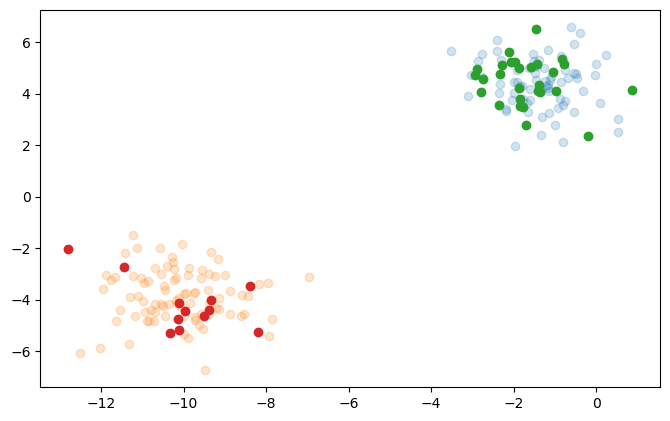

In [62]:
n_blobs = 2
X, y = make_blobs(200,2,centers=n_blobs, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

myPerceptron = Perceptron()
myPerceptron.fit(X_train,y_train)

fig = plt.figure(figsize = (8,5) ,dpi=100)
for i in np.unique(y):
  Xs=X[y==i]
  plt.scatter(Xs.T[0],Xs.T[1], alpha=0.2)

y_predict = np.zeros(len(X_test))
for i in range(len(X_test)):
  y_predict[i] = myPerceptron.predict(X_test.T[0][i],X_test.T[1][i])

for i in np.unique(y_predict):
  Xs=X_test[y_predict==i]
  plt.scatter(Xs.T[0],Xs.T[1])
